# BONUS PART Implement the solution to the heat equation for images 

**(40 points):**

Follow the slides and create an ipython notebook called `heatImage.ipynb` that implements the numerical solution to the 2D heat equation using an image as the starting “temperature” L(i,j,n), where i,j index pixels and n indexes the time step.

The easiest way is to simply use the final equation on the final slide and loop over all pixels to create the next estimate of L(i,j,n+1). You have to be a little careful with how you treat the pixels at the edge...

Use the sunflower image from above and run 100 time steps, plotting the result every 10 time steps.

# Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

from tqdm.auto import tqdm

# Heat Equation

<img width="901" alt="image" src="https://user-images.githubusercontent.com/37654013/115137839-5c8ec900-a063-11eb-948e-e3e36db530b0.png">


In [5]:
def heat_images(L:np.array, N:int=100, time_step:int=1, dx:int=1, dy:int=1):
    """
    Heat images T times at interval of time step
    
    Arguments
    ---------
    - L : image
    - N : total number
    - time_step : delta t (interval)
    - dx : delta x
    - dy : delta y
    
    """
    t_L = np.zeros((N+1,)+L.shape, dtype=np.uint8)
    t_L[0] = L # start point

    for t in tqdm(range(1,N+1,time_step)):
        left  = np.hstack([L[:,dx:], L[:,-dx:]]) # ex) [1,2,3,4] -> [2,3,4,4]
        right = np.hstack([L[:,:dx], L[:,:-dx]]) # ex) [1,2,3,4] -> [1,1,2,3]
        up    = np.vstack([L[dy:,:], L[-dy:,:]]) # ex) [[1],[2],[3],[4]] -> [[2],[3],[4],[4]]
        down  = np.vstack([L[:dy,:], L[:-dy,:]]) # ex) [[1],[2],[3],[4]] -> [[1],[1],[2],[3]]

        # Heat Equation
        t_L[t] = L + time_step*((left-(2*L)+right)/dx+(up-(2*L)+down)/dy)

        L = t_L[t]
        
    return t_L

In [6]:
img = plt.imread('image.jpeg')
t_L = heat_images(L=img, N=100, time_step=1, dx=1, dy=1)

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


Done!


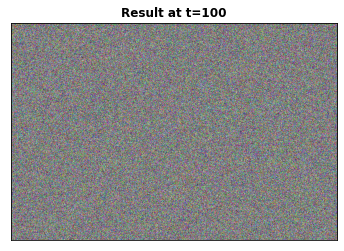

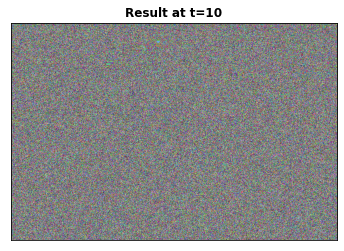

In [7]:
def plotheatmap(L, t):
    # Clear the current plot figure
    plt.clf()

    plt.imshow(L)
    plt.xticks([])
    plt.yticks([])
    plt.title('Result at t=%d' % (t), fontweight='bold')

    return plt

# plotting every 10 steps
def animate(t):
    if t%10==0:
        plotheatmap(t_L[t], t)
        
# plotting every steps
def animate1(t):
    plotheatmap(t_L[t], t)

anim = animation.FuncAnimation(plt.figure(), animate, interval=10, frames=100+1, repeat=False)
anim.save("heat_equation_10step.gif")

anim = animation.FuncAnimation(plt.figure(), animate1, interval=10, frames=10+1, repeat=False)
anim.save("heat_equation_1step.gif")

print("Done!")

# Results

As a result of calculating the heat images through the heat equation, there was no significant change in the image and only noise occurred when we printed it out every 10 times (Figure 1).

<div align='center'>
    <img src='heat_equation_10step.gif'>
    Figure 1. Heat images every 10 times
</div>

So we printed it every times, heat image has already become illegible between 1 and 10 images (Figure 2).

<div align='center'>
    <img src='heat_equation_1step.gif'>
    Figure 2. Heat images every times
</div>